In [1]:
import numpy as np

# Exercise 30
## a)

$ f(\psi) = a_1 f_1(\psi) + a_2 f_2(\psi) $

$ f(\psi) = a_1 \cos(\psi) + a_2 \sin(\psi) $

Design matrix:

$ A = (f_1(\psi), f_2(\psi)) $

$ A = (\cos(\psi), \sin(\psi)) $

In [2]:
# importing data
psi = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
psi = np.multiply(psi,2*np.pi/360)
asym = [-0.032, 0.010, 0.057, 0.068, 0.076, 0.080, 0.031, 0.005, -0.041, -0.090, -0.088, -0.074]

A = np.array([np.cos(psi), np.sin(psi)]).T
print('Design Matrix:\n', A)

Design Matrix:
 [[ 1.00000000e+00  0.00000000e+00]
 [ 8.66025404e-01  5.00000000e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-5.00000000e-01  8.66025404e-01]
 [-8.66025404e-01  5.00000000e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-8.66025404e-01 -5.00000000e-01]
 [-5.00000000e-01 -8.66025404e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 5.00000000e-01 -8.66025404e-01]
 [ 8.66025404e-01 -5.00000000e-01]]


$B = (A^TA)^{-1}A^T$

In [3]:
B = np.linalg.inv(A.T@A)@A.T
a = B@asym
print('a = ', a)

a =  [-0.0375063   0.07739978]


## b)

In [10]:
#error of asym: 0.011
V = np.diag([0.011**2]*12)  # V: Covariance matrix of "asym" measurements

#covariance matrix of a1, a2
# Cov = B@V@B.T #nur der S04

Cov = 0.011**2 * np.linalg.inv(A.T@A) # should give same result

print("covariance matrix:\n", Cov, "\n")
print("errors:\n", "a_1:", np.sqrt(Cov[0,0]), "\n", "a_2:", np.sqrt(Cov[1,1]), "\n")
print("correlation coefficient:\n", Cov[0,1]/(np.sqrt(Cov[0,0])*np.sqrt(Cov[1,1])))

covariance matrix:
 [[ 2.01666667e-05 -1.31944981e-21]
 [-1.31944981e-21  2.01666667e-05]] 

errors:
 a_1: 0.004490731195102493 
 a_2: 0.004490731195102493 

correlation coefficient:
 -6.542726332681614e-17


$\rho = \frac{\text{Cov}(a_1,a_2)}{\sigma_{a1}\sigma_{a2}}$

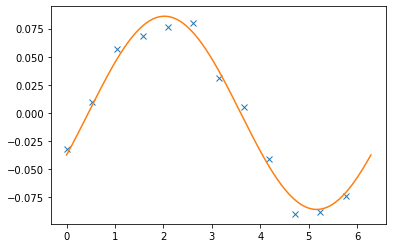

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()

x = np.linspace(0, 2*np.pi, 1000)

ax = fig.add_subplot(1,1,1)
ax.plot(psi, asym, marker = "x", lw = 0)
ax.plot(x, a[0]*np.cos(x) + a[1]*np.sin(x))

## c)